# Image segmentation 

This notebook covers image segmentation using different thresholding algorithms implemented using scikit-image and stardist

In [1]:
import matplotlib.pyplot as plt # allows you to display fgures/graphics etfc
import numpy as np #vectorized operations on matrices
import pandas as pd # dataframes i.e excel sheets in python


In [2]:

from skimage.filters import threshold_li
from skimage.measure import regionprops, label, regionprops_table
from skimage.color import label2rgb

In [3]:
import nd2

In [4]:
my_image = nd2.imread("A.nd2")

In [7]:
position1 = my_image[0, :, :, :, :]
position1_dapi = position1[:, 0, :, :]
max_proj = np.max(position1_dapi, axis=0)

In [9]:
short_way_to_do_it = np.max(my_image[0,:, 0, :, :], axis= 0)

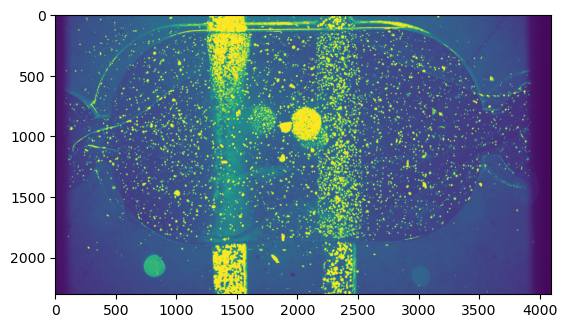

In [11]:
plt.imshow(max_proj, vmax=1000)

In [19]:
thresholded_manual = np.where((max_proj >= 1000), 1, 0)


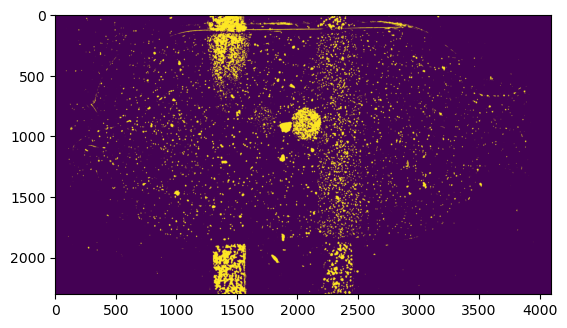

In [20]:
plt.imshow(thresholded_manual)

In [22]:

thresholded_li = threshold_li(max_proj)
print(thresholded_li)

827.5244950607286


In [25]:
#binarize the spheroid channel
binary = max_proj > thresholded_li


In [ ]:
#label the binary image
labeled = label(binary)

In [ ]:
#overlay labels on labeled image
image_label_overlay = label2rgb(labeled, image=max_proj, bg_label=0)

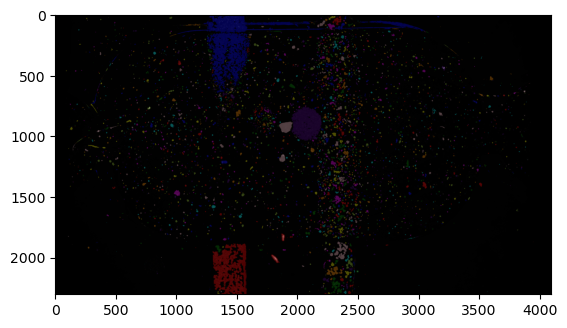

In [28]:
plt.imshow(image_label_overlay)

In [33]:

#define properties to be extracted
props_list = [
    'area',
    'label',
    'intensity_mean',
]


In [34]:

# defining data tables
data_table = regionprops_table(labeled, properties=props_list, intensity_image=max_proj)


In [35]:

df = pd.DataFrame(data_table)

In [36]:
import seaborn as sns 

<Axes: xlabel='intensity_mean', ylabel='area'>

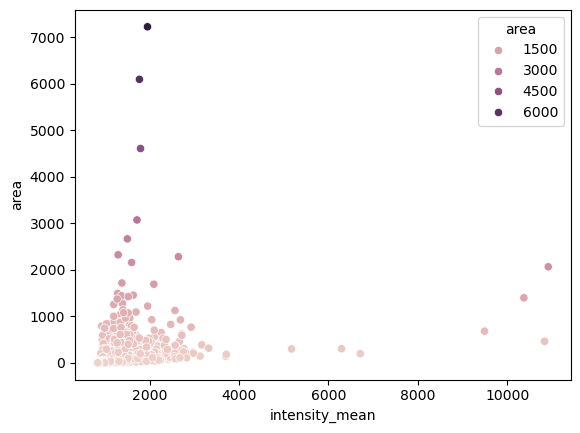

In [42]:
data2 = df[df["area"]<10000]
sns.scatterplot(data = data2, y="area", x="intensity_mean", hue = 'area')